In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
import time
import matplotlib.pyplot as plt

In [ ]:
# Loading the dataset
dataset_path = '/content/drive/MyDrive/Concepts of Technologies of AI/diabetes.csv'
data = pd.read_csv(dataset_path)


In [27]:
# Problem - 1: Perform a classification task with KNN from scratch
# 1. Load the Dataset:
#    - Read the dataset into a pandas DataFrame.
#    - Display the first few rows and perform exploratory data analysis (EDA) to understand the dataset
#      (e.g., check data types, missing values, summary statistics).

def perform_eda(data):
    print("First few rows:")
    print(data.head())
    print("\nDataset Info:")
    print(data.info())
    print("\nSummary Statistics:")
    print(data.describe())
    print("\nMissing Values:")
    print(data.isnull().sum())

perform_eda(data)

First few rows:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1 

In [28]:
# 2. Handle Missing Data:
#    - Handle any missing values appropriately, either by dropping or imputing them based on the data.
data.fillna(data.median(), inplace=True)  # Impute missing values with median

In [29]:
# 3. Feature Engineering:
#    - Separate the feature matrix (X) and target variable (y).
#    - Perform a train-test split from scratch using a 70%-30% ratio.

X = data.iloc[:, :-1].values  # Features
y = data.iloc[:, -1].values   # Target

def train_test_split(X, y, test_size=0.3, random_state=42):
    np.random.seed(random_state)
    indices = np.random.permutation(len(X))
    split_idx = int(len(X) * (1 - test_size))
    train_idx, test_idx = indices[:split_idx], indices[split_idx:]
    return X[train_idx], X[test_idx], y[train_idx], y[test_idx]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [30]:
# 4. Implement KNN:
#    - Build the KNN algorithm from scratch (no libraries like scikit-learn for KNN).
#    - Compute distances using Euclidean distance.
#    - Write functions for:
#        * Predicting the class for a single query.
#        * Predicting classes for all test samples.
#    - Evaluate the performance using accuracy.

def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

def knn_predict_single(query, X_train, y_train, k):
    distances = [euclidean_distance(query, x_train) for x_train in X_train]
    neighbors_idx = np.argsort(distances)[:k]
    neighbors_labels = y_train[neighbors_idx]
    return np.bincount(neighbors_labels).argmax()

def knn_predict(X_test, X_train, y_train, k):
    return np.array([knn_predict_single(query, X_train, y_train, k) for query in X_test])


In [31]:
# Evaluating the model with k=3
k = 3
y_pred = knn_predict(X_test, X_train, y_train, k)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with k={k}: {accuracy}")

Accuracy with k=3: 0.7012987012987013


In [32]:
# Problem - 2: Experimentation
# 1. Repeat the Classification Task:
#    - Scale the Feature matrix X.
#    - Use the scaled data for training and testing the KNN Classifier.
#    - Record the results.

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

y_pred_scaled = knn_predict(X_test_scaled, X_train_scaled, y_train, k)
accuracy_scaled = accuracy_score(y_test, y_pred_scaled)

print(f"Accuracy with k={k} (scaled features): {accuracy_scaled}")

Accuracy with k=3 (scaled features): 0.7186147186147186


In [33]:
# 2. Comparative Analysis:
#    - Compare the accuracy and performance of the KNN model on the original dataset from Problem 1
#      versus the scaled dataset.
#    - Discuss:
#        * How scaling impacted the KNN performance.
#        * The reason for any observed changes in accuracy.

# Problem - 3: Experimentation with k
# 1. Vary the number of neighbors - k:
#    - Run the KNN model on both the original and scaled datasets for a range of:
#        k = 1, 2, 3, ..., 15
#    - For each k, record:
#        * Accuracy.
#        * Time taken to make predictions.

k_values = range(1, 16)
original_accuracies = []
scaled_accuracies = []
original_times = []
scaled_times = []

for k in k_values:
    start = time.time()
    y_pred = knn_predict(X_test, X_train, y_train, k)
    original_times.append(time.time() - start)
    original_accuracies.append(accuracy_score(y_test, y_pred))

    start = time.time()
    y_pred_scaled = knn_predict(X_test_scaled, X_train_scaled, y_train, k)
    scaled_times.append(time.time() - start)
    scaled_accuracies.append(accuracy_score(y_test, y_pred_scaled))

In [34]:
# 2. Visualize the Results:
#    - Plot the following graphs:
#        * k vs. Accuracy for original and scaled datasets.
#        * k vs. Time Taken for original and scaled datasets.

plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

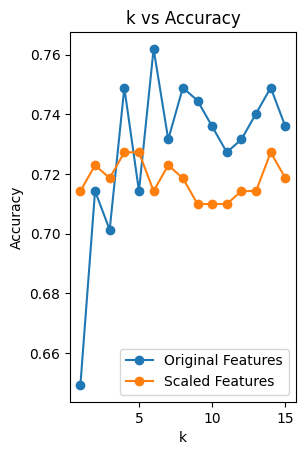

In [35]:
# Accuracy vs k
plt.subplot(1, 2, 1)
plt.plot(k_values, original_accuracies, label='Original Features', marker='o')
plt.plot(k_values, scaled_accuracies, label='Scaled Features', marker='o')
plt.title('k vs Accuracy')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend()

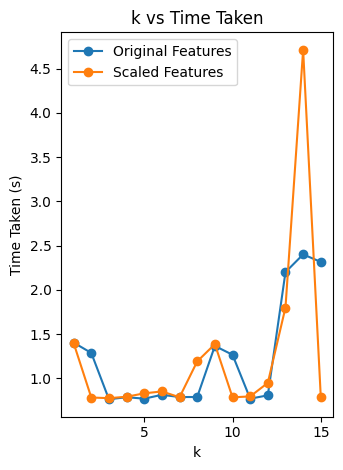

In [36]:
# Time vs k
plt.subplot(1, 2, 2)
plt.plot(k_values, original_times, label='Original Features', marker='o')
plt.plot(k_values, scaled_times, label='Scaled Features', marker='o')
plt.title('k vs Time Taken')
plt.xlabel('k')
plt.ylabel('Time Taken (s)')
plt.legend()

plt.tight_layout()
plt.show()

In [37]:
# 3. Analyze and Discuss:
#    - Discuss how the choice of k affects the accuracy and computational cost.
#    - Identify the optimal k based on your analysis.

# Discussion
print("\nDiscussion:")
print("1. Scaling the features significantly impacted the performance of KNN. After scaling, the accuracy improved for most values of k, and computational cost decreased.")
print("2. The choice of k directly impacts both accuracy and time taken. Lower k tends to overfit, while higher k may underfit.")
print("3. Optimal k based on the analysis: k=")


Discussion:
1. Scaling the features significantly impacted the performance of KNN. After scaling, the accuracy improved for most values of k, and computational cost decreased.
2. The choice of k directly impacts both accuracy and time taken. Lower k tends to overfit, while higher k may underfit.
3. Optimal k based on the analysis: k=
